In [1]:
import statistics
from scipy import stats
import numpy as np # math 

import seaborn as sns
import matplotlib.pyplot as plt


import pandas as pd

In [9]:
data=pd.DataFrame({
    "sales":(1, 2, 3, 4, 5,6, 7, 8, 9, 10)
})
data

,sales
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [13]:

data.mean()

sales    5.5
dtype: float64

Text(0.5, 1.0, 'Sales Distribution')

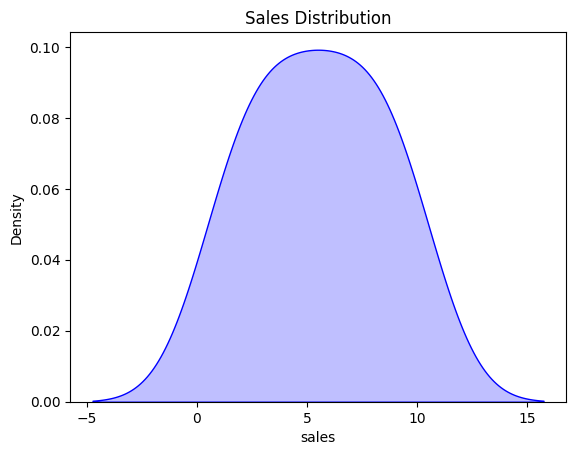

In [17]:
sns.kdeplot(data['sales'], color='blue',  fill=True)
plt.title('Sales Distribution')

In [ ]:
data=pd.read_csv('customer_reviews.csv')
data.head()

,ReviewID,CustomerID,ProductID,ReviewDate,Rating,ReviewText
0,1,77,18,2023-12-23,3,"Average experience, nothing special."
1,2,80,19,2024-12-25,5,The quality is top-notch.
2,3,50,13,2025-01-26,4,Five stars for the quick delivery.
3,4,78,15,2025-04-21,3,"Good quality, but could be cheaper."
4,5,64,2,2023-07-16,3,"Average experience, nothing special."
...,...,...,...,...,...,...
95,96,19,13,2023-09-02,3,"Good quality, but could be cheaper."
96,97,64,6,2024-01-19,3,"The product is okay, but the instruction..."
97,98,96,3,2025-11-20,5,Exceeded my expectations!
98,99,79,16,2025-01-29,2,"Average experience, nothing special."


Text(0.5, 1.0, 'Rating Distribution')

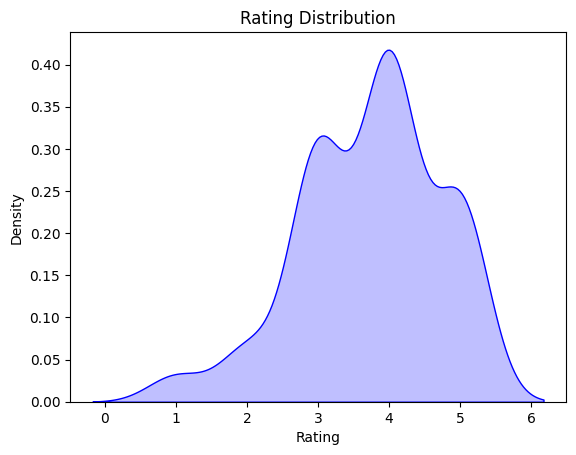

In [21]:
sns.kdeplot(data['Rating'], color='blue',  fill=True)
plt.title('Rating Distribution')

In [38]:
import mysql.connector as db
import pandas as pd


# connecting to the database
user  = 'demo'
passcode = "Kart123@"
host = 'localhost'
db_name = "shop_easy"

db_connextion = db.connect(

                host  = host,
                user = user,
                password = passcode,
                database = db_name
)
db_connextion

In [19]:
currsor=db_connextion.cursor()

In [8]:
# executing the query
query = '''select ContentType,count(ContentType) as count
 from customer_enage
where likes>104
group by ContentType
order by count desc;'''
currsor.execute(query)
result = currsor.fetchall()
for i in result:
    print(i)



('Socialmedia', 10)
('Blog', 8)
('video', 8)
('newsletter', 4)


In [20]:
query='''select *
from customers_journey
where action='Drop-off';'''
currsor.execute(query)
re=currsor.fetchall()
for i in re:
    print(i)

(1, 64, 18, datetime.date(2024, 6, 10), 'Checkout', 'Drop-off', 182.0)
(2, 94, 11, datetime.date(2025, 7, 9), 'Checkout', 'Drop-off', 182.0)
(4, 33, 18, datetime.date(2025, 5, 28), 'Checkout', 'Drop-off', 182.0)
(11, 23, 12, datetime.date(2023, 8, 22), 'Checkout', 'Drop-off', 182.0)
(21, 58, 20, datetime.date(2024, 3, 7), 'Checkout', 'Drop-off', 182.0)
(24, 77, 6, datetime.date(2025, 6, 25), 'Checkout', 'Drop-off', 182.0)
(32, 67, 11, datetime.date(2023, 9, 4), 'Checkout', 'Drop-off', 182.0)
(37, 38, 17, datetime.date(2024, 6, 18), 'Checkout', 'Drop-off', 182.0)
(47, 30, 20, datetime.date(2024, 2, 18), 'checkout', 'Drop-off', 182.0)
(52, 15, 9, datetime.date(2025, 8, 7), 'Checkout', 'Drop-off', 182.0)
(54, 9, 11, datetime.date(2024, 11, 19), 'checkout', 'Drop-off', 182.0)
(55, 1, 7, datetime.date(2024, 3, 17), 'Checkout', 'Drop-off', 182.0)
(71, 40, 20, datetime.date(2023, 7, 13), 'Checkout', 'Drop-off', 182.0)
(93, 43, 8, datetime.date(2023, 8, 22), 'Checkout', 'Drop-off', 182.0)


In [21]:
que='''select products.productName,count(*) as good_products
from products inner join customer_reviews
on products.productID=customer_reviews.ProductID
where customer_reviews.Rating>=4
group by products.productID
order by good_products desc;'''
currsor.execute(que)
r=currsor.fetchall()
for i in r:
    print(i)


('Swim Goggles', 6)
('Surfboard', 6)
('Hockey Stick', 5)
('Tennis Racket', 5)
('Ski Boots', 5)
('Kayak', 5)
('Fitness Tracker', 4)
('Climbing Rope', 4)
('Yoga Mat', 4)
('Running Shoes', 3)
('Football Helmet', 3)
('Soccer Ball', 3)
('Baseball Glove', 2)
('Volleyball', 2)
('Boxing Gloves', 2)
('Golf Clubs', 2)
('Dumbbells', 1)


In [22]:
query='''select sum(number_of_young_customers) as total_young_customers from (select rating, age, count(*) as number_of_young_customers
from customers as c
inner join customer_reviews as cr
on c.CustomerID=cr.CustomerID
where age<=30
group by age,rating
order by age desc)as subquery;
-- male customers=43 and female=57
'''
currsor.execute(query)
result = currsor.fetchall()
for i in result:
    print(i)

(Decimal('29'),)


In [25]:
currsor.close()

True

In [28]:
currsor=db_connextion.cursor()

In [ ]:
quy='''select sum(number_of_young_customers) as total_young_customers from (select rating, age, count(*) as number_of_young_customers
from customers as c
inner join customer_reviews as cr
on c.CustomerID=cr.CustomerID
where age>=30
group by age,rating
order by age desc)as subquery;
-- male customers=43 and female=57
'''
currsor.execute(quy)
re = currsor.fetchall()
for i in re:
    print(i)

In [32]:
currsor.close()

True

In [34]:
currsor=db_connextion.cursor()

In [ ]:
q='''Select geography.Country, count(*) as customercount 
from customers 
inner join geography
on customers.GeographyID=geography.GeographyID
group by geography.Country
order by customercount desc;
-- best performing counteries are spain,italy,germany,france'''
currsor.execute(q)
re= currsor.fetchall()
for i in re:
    print(i)

In [36]:
currsor.close()

True

In [ ]:
currsor=db_connextion.cursor()

In [40]:
query='''select customer_enage.ProductID,ReviewText,rating,count(*) as new_rating
from customer_reviews inner join customer_enage
on  customer_reviews.productID=customer_enage.productID
where Rating<=3
group by ReviewText,rating,customer_enage.ProductID ;'''
currsor.execute(query)
result = currsor.fetchall()
for i in result:
    print(i)

(18, 'Average  experience,  nothing  special.', 3, 4)
(15, 'Good  quality,  but  could  be  cheaper.', 3, 7)
(2, 'Average  experience,  nothing  special.', 3, 6)
(1, 'Average  experience,  nothing  special.', 3, 5)
(2, 'Product  did    not  meet  my  expectations.', 2, 6)
(4, 'Not  worth  the  money.', 3, 4)
(6, 'I  had  a  bad  experience  with  this  product.', 1, 5)
(4, 'I  love  this    product,  will  buy  again!', 3, 4)
(4, 'Good  quality,  but  could  be    cheaper.', 3, 4)
(12, 'Average  experience,  nothing  special.', 3, 5)
(9, 'Good  quality,  but  could  be  cheaper.', 3, 4)
(3, 'Average  experience,  nothing    special.', 3, 4)
(17, 'Average  experience,  nothing  special.', 3, 5)
(16, 'Not  worth  the  money.', 3, 24)
(7, 'Good  quality,  but  could    be  cheaper.', 3, 8)
(4, 'The  product  stopped  working  after  a  month.', 1, 4)
(9, 'Customer  support  was    very  helpful.', 3, 4)
(10, 'Shipping  was  fast  and  the  item  was  well-packaged.', 3, 4)
(10, 'Disappoin

In [41]:
currsor.close()
db_connextion.close()